In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.stem.snowball import SnowballStemmer
import string
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


In [ ]:
#To show entire text under column comment_text
pd.set_option('display.max_colwidth', -1)

In [ ]:
#load the file
df=pd.read_csv('E://private/Intern/Fake-news-project/Fake news project/train_news.csv')
df

In [ ]:
#checking null values present or not
#null values present in headline and written_by columns .
df.isnull().sum()

In [ ]:
df.info()

In [ ]:
#presentation of null values
sns.heatmap(data=df.isnull())

In [ ]:
df=df.dropna()

In [ ]:
df

In [ ]:
#Lets delete 'Unnamed column' and 'id' columns . These columns does not have any impact on target variable
df=df.drop(['Unnamed: 0','id'],axis=1)

In [ ]:
df

In [ ]:
df['label'].value_counts()
#it is quite balanced data

In [ ]:
sns.countplot(data=df,x='label')

In [ ]:
df['news']=df['news'].str.replace('[^a-zA-Z ]', '')


In [ ]:
df['news']

In [ ]:
stop_words=set(stopwords.words('english'))

In [ ]:
#Lets do  stemming.It will remove ing,ed and all from the words
stemmer = SnowballStemmer("english")
def stemming(sentence):
    stemSentence = ""
    for word in sentence.split():
        stem = stemmer.stem(word)
        stemSentence += stem
        stemSentence += " "
    stemSentence = stemSentence.strip()
    return stemSentence

In [ ]:
def cleanDocument(df):
    df=df.str.replace('[^a-zA-Z ]', '')
    df=df.str.replace(r'\s+',' ')
    df=df.apply(lambda x:' '.join(term for term in x.split() if term not in stop_words))
    df =df.apply(stemming)
    df=df.apply(lambda x:' '.join(term for term in x.split() if len(term) > 3 ))
    df=df.str.lower()
    return df
    

In [ ]:
df['news']=cleanDocument(df['news'])

In [ ]:
df

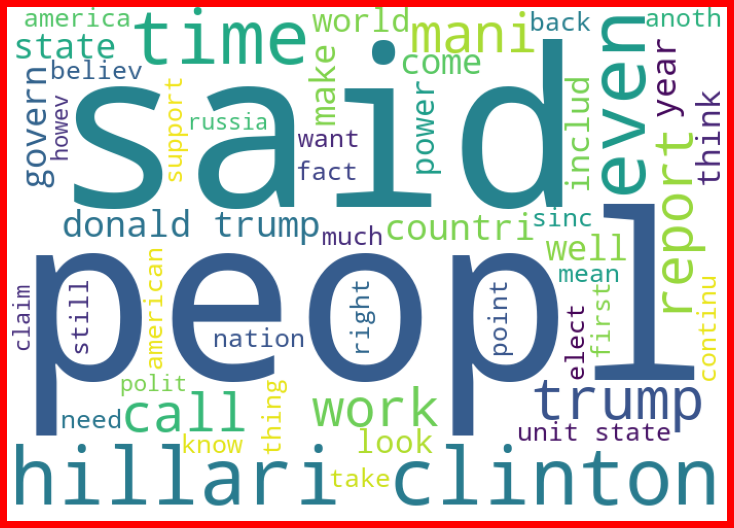

In [111]:
#Getting loud words for fake news
from wordcloud import WordCloud

fake_news=df['news'][df['label']==1]
fake_news_cloud=WordCloud(width=700,height=500,background_color='white',max_words=50).generate(' '.join(fake_news))


plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(fake_news_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

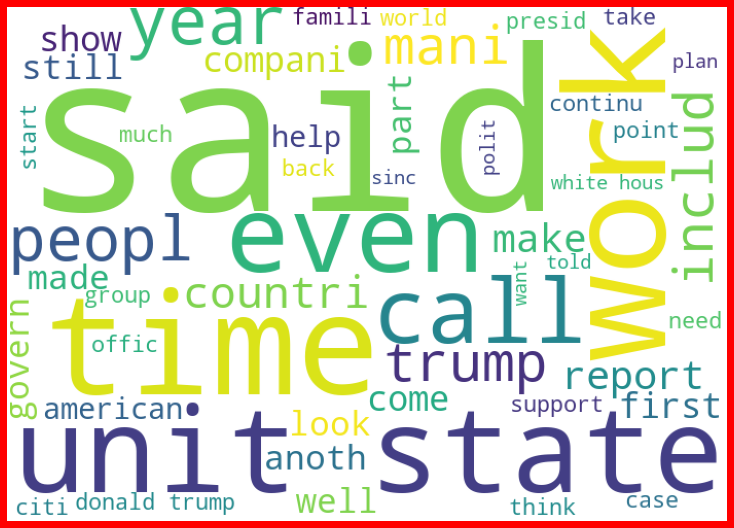

In [110]:
#Getting loud words for real news

real_news=df['news'][df['label']==0]
real_news_cloud=WordCloud(width=700,height=500,background_color='white',max_words=50).generate(' '.join(real_news))
real_news_cloud

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(real_news_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
tf_vec=TfidfVectorizer(max_features=5000)
features=tf_vec.fit_transform(df['news'])
x=features

In [ ]:
y=df['label']

In [ ]:
tf_vec.get_feature_names()

In [ ]:
#train and predict
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42,shuffle=True)

In [112]:
#lets create model
#It is a binary classification .So we can use logistc regression,SVC,RandomForest

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print('logistc regression metrics::::::::::::')
print('accuracy score::::::::::::::',accuracy_score(y_test,y_pred))
print('classification report ::::::::::::::\n',classification_report(y_test,y_pred))
print('confusion matrix ::::::::::::::\n',confusion_matrix(y_test,y_pred))




logistc regression metrics::::::::::::
accuracy score:::::::::::::: 0.9392945036915504
classification report ::::::::::::::
               precision    recall  f1-score   support

           0       0.95      0.95      0.95      2097
           1       0.93      0.93      0.93      1560

    accuracy                           0.94      3657
   macro avg       0.94      0.94      0.94      3657
weighted avg       0.94      0.94      0.94      3657

confusion matrix ::::::::::::::
 [[1989  108]
 [ 114 1446]]


In [113]:

mn_nb=MultinomialNB()
mn_nb.fit(x_train,y_train)
y_pred=mn_nb.predict(x_test)
print('Multinomial NB metrics::::::::::::')
print('accuracy score::::::::::::::',accuracy_score(y_test,y_pred))
print('classification report ::::::::::::::\n',classification_report(y_test,y_pred))
print('confusion matrix ::::::::::::::\n',confusion_matrix(y_test,y_pred))


Multinomial NB metrics::::::::::::
accuracy score:::::::::::::: 0.8796828001093793
classification report ::::::::::::::
               precision    recall  f1-score   support

           0       0.86      0.94      0.90      2097
           1       0.91      0.79      0.85      1560

    accuracy                           0.88      3657
   macro avg       0.89      0.87      0.87      3657
weighted avg       0.88      0.88      0.88      3657

confusion matrix ::::::::::::::
 [[1979  118]
 [ 322 1238]]


In [114]:

gs_nb=GaussianNB()
gs_nb.fit(x_train.toarray(),y_train)
y_pred=gs_nb.predict(x_test.toarray())
print('Gaussian NB metrics::::::::::::')
print('accuracy score::::::::::::::',accuracy_score(y_test,y_pred))
print('classification report ::::::::::::::\n',classification_report(y_test,y_pred))
print('confusion matrix ::::::::::::::\n',confusion_matrix(y_test,y_pred))


Gaussian NB metrics::::::::::::
accuracy score:::::::::::::: 0.8547990155865464
classification report ::::::::::::::
               precision    recall  f1-score   support

           0       0.89      0.85      0.87      2097
           1       0.81      0.86      0.83      1560

    accuracy                           0.85      3657
   macro avg       0.85      0.86      0.85      3657
weighted avg       0.86      0.85      0.86      3657

confusion matrix ::::::::::::::
 [[1788  309]
 [ 222 1338]]


In [115]:
from sklearn.tree import DecisionTreeClassifier

d_tree=DecisionTreeClassifier()
d_tree.fit(x_train,y_train)
y_pred=d_tree.predict(x_test)
print('DecisionTreeClassifier metrics::::::::::::')
print('accuracy score::::::::::::::',accuracy_score(y_test,y_pred))
print('classification report ::::::::::::::\n',classification_report(y_test,y_pred))
print('confusion matrix ::::::::::::::\n',confusion_matrix(y_test,y_pred))

DecisionTreeClassifier metrics::::::::::::
accuracy score:::::::::::::: 0.8498769483182936
classification report ::::::::::::::
               precision    recall  f1-score   support

           0       0.88      0.86      0.87      2097
           1       0.82      0.84      0.83      1560

    accuracy                           0.85      3657
   macro avg       0.85      0.85      0.85      3657
weighted avg       0.85      0.85      0.85      3657

confusion matrix ::::::::::::::
 [[1804  293]
 [ 256 1304]]


In [116]:
from sklearn.ensemble import RandomForestClassifier
rf_=RandomForestClassifier()
rf_.fit(x_train,y_train)
y_pred=rf_.predict(x_test)
print('RandomForestClassifier metrics::::::::::::')
print('accuracy score::::::::::::::',accuracy_score(y_test,y_pred))
print('classification report ::::::::::::::\n',classification_report(y_test,y_pred))
print('confusion matrix ::::::::::::::\n',confusion_matrix(y_test,y_pred))

RandomForestClassifier metrics::::::::::::
accuracy score:::::::::::::: 0.9176920973475526
classification report ::::::::::::::
               precision    recall  f1-score   support

           0       0.90      0.97      0.93      2097
           1       0.95      0.85      0.90      1560

    accuracy                           0.92      3657
   macro avg       0.92      0.91      0.91      3657
weighted avg       0.92      0.92      0.92      3657

confusion matrix ::::::::::::::
 [[2029   68]
 [ 233 1327]]


In [117]:
from sklearn.neighbors import KNeighborsClassifier
kneighbor=KNeighborsClassifier()
kneighbor.fit(x_train,y_train)
y_pred=kneighbor.predict(x_test)
print('KNeighborsClassifier metrics::::::::::::')
print('accuracy score::::::::::::::',accuracy_score(y_test,y_pred))
print('classification report ::::::::::::::\n',classification_report(y_test,y_pred))
print('confusion matrix ::::::::::::::\n',confusion_matrix(y_test,y_pred))

KNeighborsClassifier metrics::::::::::::
accuracy score:::::::::::::: 0.5581077385835385
classification report ::::::::::::::
               precision    recall  f1-score   support

           0       0.91      0.25      0.40      2097
           1       0.49      0.97      0.65      1560

    accuracy                           0.56      3657
   macro avg       0.70      0.61      0.52      3657
weighted avg       0.73      0.56      0.51      3657

confusion matrix ::::::::::::::
 [[ 533 1564]
 [  52 1508]]


In [118]:
import sklearn
sgd=sklearn.linear_model.SGDClassifier()
sgd.fit(x_train,y_train)
y_pred=sgd.predict(x_test)
print('SGDClassifier metrics::::::::::::')
print('accuracy score::::::::::::::',accuracy_score(y_test,y_pred))
print('classification report ::::::::::::::\n',classification_report(y_test,y_pred))
print('confusion matrix ::::::::::::::\n',confusion_matrix(y_test,y_pred))

SGDClassifier metrics::::::::::::
accuracy score:::::::::::::: 0.93956795187312
classification report ::::::::::::::
               precision    recall  f1-score   support

           0       0.94      0.95      0.95      2097
           1       0.93      0.92      0.93      1560

    accuracy                           0.94      3657
   macro avg       0.94      0.94      0.94      3657
weighted avg       0.94      0.94      0.94      3657

confusion matrix ::::::::::::::
 [[1995  102]
 [ 119 1441]]


In [119]:
perceptron=sklearn.linear_model.Perceptron()
perceptron.fit(x_train,y_train)
y_pred=perceptron.predict(x_test)
print('perceptron metrics::::::::::::')
print('accuracy score::::::::::::::',accuracy_score(y_test,y_pred))
print('classification report ::::::::::::::\n',classification_report(y_test,y_pred))
print('confusion matrix ::::::::::::::\n',confusion_matrix(y_test,y_pred))

perceptron metrics::::::::::::
accuracy score:::::::::::::: 0.9283565764287668
classification report ::::::::::::::
               precision    recall  f1-score   support

           0       0.94      0.93      0.94      2097
           1       0.91      0.92      0.92      1560

    accuracy                           0.93      3657
   macro avg       0.93      0.93      0.93      3657
weighted avg       0.93      0.93      0.93      3657

confusion matrix ::::::::::::::
 [[1958  139]
 [ 123 1437]]


In [120]:
pac=sklearn.linear_model.PassiveAggressiveClassifier()
pac.fit(x_train,y_train)
y_pred=pac.predict(x_test)
print('PassiveAggressiveClassifier metrics::::::::::::')
print('accuracy score::::::::::::::',accuracy_score(y_test,y_pred))
print('classification report ::::::::::::::\n',classification_report(y_test,y_pred))
print('confusion matrix ::::::::::::::\n',confusion_matrix(y_test,y_pred))

PassiveAggressiveClassifier metrics::::::::::::
accuracy score:::::::::::::: 0.9264424391577796
classification report ::::::::::::::
               precision    recall  f1-score   support

           0       0.94      0.93      0.94      2097
           1       0.91      0.92      0.91      1560

    accuracy                           0.93      3657
   macro avg       0.92      0.93      0.92      3657
weighted avg       0.93      0.93      0.93      3657

confusion matrix ::::::::::::::
 [[1957  140]
 [ 129 1431]]


In [104]:
#Linear regression and sgdclassifier working better
#Lets  fine tune the model using hyper parameter
parameters={'penalty':['l1','l2', 'elasticnet', 'none'],'multi_class':['auto', 'ovr', 'multinomial'],'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],'C':[1.0,1.5,2.0]}
grid_cv=sklearn.model_selection.GridSearchCV(lr,parameters)
grid_cv.fit(x_train,y_train)
grid_cv.best_params_


C:\Users\STS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\STS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\STS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\STS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\STS\anaconda3\lib\site-packages\sklearn\model_selection\_validat

C:\Users\STS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\STS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\STS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\STS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 453, in _check_solver
    raise ValueError(
ValueError: penalty='none' is not supported for the liblinear solver

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\STS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_

C:\Users\STS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\STS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\STS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\STS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 449, in _check_solver
    raise ValueError("Only 'saga' solver supports elasticnet penalty,"
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\STS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py

C:\Users\STS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\STS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\STS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\STS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\STS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: Conv

C:\Users\STS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\STS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\STS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\STS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\STS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef

C:\Users\STS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\STS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\STS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1312, in fit
    raise ValueError("l1_ratio must be between 0 and 1;"
ValueError: l1_ratio must be between 0 and 1; got (l1_ratio=None)

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\STS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\STS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty=

C:\Users\STS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\STS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\STS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\STS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\STS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: Conv

C:\Users\STS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\STS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\STS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\STS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\STS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\

C:\Users\STS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\STS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\STS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\STS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1348, in fit
    multi_class = _check_multi_class(self.multi_class, solver,
  File "C:\Users\STS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 472, in _check_multi_class
    raise ValueError("Solver %s does not support "
ValueError: Solver liblinear does

C:\Users\STS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\STS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\STS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\STS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\STS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\

C:\Users\STS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\STS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\STS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\STS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 449, in _check_solver
    raise ValueError("Only 'saga' solver supports elasticnet penalty,"
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\STS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py

C:\Users\STS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\STS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\STS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\STS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\STS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train,

C:\Users\STS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\STS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\STS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\STS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\STS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\STS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' wil

C:\Users\STS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\STS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\STS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1348, in fit
    multi_class = _check_multi_class(self.multi_class, solver,
  File "C:\Users\STS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 472, in _check_multi_class
    raise ValueError("Solver %s does not support "
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\STS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estima

C:\Users\STS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\STS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\STS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\STS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\STS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\STS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' wil

{'C': 2.0, 'multi_class': 'multinomial', 'penalty': 'l2', 'solver': 'saga'}

In [121]:
#Linear regression working better
#Lets  fine tune the model using hyper parameter
parameters={'loss':['log', 'modified_huber', 'squared_hinge', 'perceptron'],'penalty':['l2', 'l1', 'elasticnet'],'alpha':[0.01,0.001,0.0001]}
grid_cv=sklearn.model_selection.GridSearchCV(sgd,parameters)
grid_cv.fit(x_train,y_train)
grid_cv.best_params_


C:\Users\STS\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


{'alpha': 0.0001, 'loss': 'modified_huber', 'penalty': 'elasticnet'}

In [122]:

sgd=sklearn.linear_model.SGDClassifier(alpha=0.0001,loss='modified_huber',penalty='elasticnet')
sgd.fit(x_train,y_train)
y_pred=sgd.predict(x_test)
print('SGDClassifier metrics::::::::::::')
print('accuracy score::::::::::::::',accuracy_score(y_test,y_pred))
print('classification report ::::::::::::::\n',classification_report(y_test,y_pred))
print('confusion matrix ::::::::::::::\n',confusion_matrix(y_test,y_pred))

SGDClassifier metrics::::::::::::
accuracy score:::::::::::::: 0.9439431227782336
classification report ::::::::::::::
               precision    recall  f1-score   support

           0       0.96      0.95      0.95      2097
           1       0.93      0.94      0.93      1560

    accuracy                           0.94      3657
   macro avg       0.94      0.94      0.94      3657
weighted avg       0.94      0.94      0.94      3657

confusion matrix ::::::::::::::
 [[1985  112]
 [  93 1467]]


In [123]:

lr=LogisticRegression(C= 2.0, multi_class= 'multinomial', penalty= 'l2', solver= 'saga')
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print('logistc regression metrics::::::::::::')
print('accuracy score::::::::::::::',accuracy_score(y_test,y_pred))
print('classification report ::::::::::::::\n',classification_report(y_test,y_pred))
print('confusion matrix ::::::::::::::\n',confusion_matrix(y_test,y_pred))



logistc regression metrics::::::::::::
accuracy score:::::::::::::: 0.9442165709598032
classification report ::::::::::::::
               precision    recall  f1-score   support

           0       0.95      0.95      0.95      2097
           1       0.93      0.94      0.93      1560

    accuracy                           0.94      3657
   macro avg       0.94      0.94      0.94      3657
weighted avg       0.94      0.94      0.94      3657

confusion matrix ::::::::::::::
 [[1992  105]
 [  99 1461]]


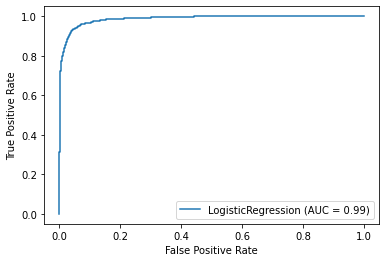

In [126]:
sklearn.metrics.plot_roc_curve(lr, x_test, y_test) 
plt.show()

In [128]:
sklearn.metrics.roc_auc_score(y_test, y_pred)

0.9432334653901178

In [129]:
#save lr model in pickle file
joblib.dump(lr,'FakeNewsNLP.pkl')

['FakeNewsNLP.pkl']